# Called Third Strike
## Part 2. Data Exploration 
![](resources/baseball_umpire_home_plate_1.jpg)  
This project's goal is to build probability models for as to whether a pitch will be called a strike or not. The intended models are to be:
1. A neural network (NN) based approach.
2. A non-NN based approach.

---

__**This Notebook's**__ objective is to explore the data to gain further familiarity with it, and to identify candiate features for our 

---

### Import Data

We have saved local versions of the data, so we will ingest them from there.

We'll use `pandas` to read into dataframes and explore. 

In [147]:
### Data handling
import pandas as pd

# We should visualize some of the data, so let's get seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df_train = pd.read_csv('../data/train_ingested.csv')
df_test = pd.read_csv('../data/test_ingested.csv')

In [149]:
df_test.shape

(18633, 30)

Let's work with the training data.

In [150]:
df_train.head().T

,0,1,2,3,4
pitch_id,01311c57-5046-48d7-ac68-000060a98ccb,208d0186-b7c9-46bd-8297-0001539b714c,4a24d09e-2d9b-4d12-a0eb-0004723ce539,486aa6b8-7c43-4974-8a53-000611a9c649,2aff251b-099b-447b-9862-00100124b7c1
season,2021,2021,2021,2021,2021
game_date,2021-05-13,2021-07-29,2021-05-15,2021-06-05,2021-06-13
inning,7,9,1,1,3
side,home,home,home,home,home
run_diff,-2,4,0,2,-2
at_bat_index,54,69,1,5,24
pitch_of_ab,5,2,3,3,5
batter,405947,468294,406141,615134,626949
pitcher,756778,778005,451846,564585,784463


On broad visual inspection, seems to make sense. We'll definitely get a opportunity for more questions as we go through each feature/target, which is the plan.

In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354039 entries, 0 to 354038
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   pitch_id              354039 non-null  object 
 1   season                354039 non-null  int64  
 2   game_date             354039 non-null  object 
 3   inning                354039 non-null  int64  
 4   side                  354039 non-null  object 
 5   run_diff              354039 non-null  int64  
 6   at_bat_index          354039 non-null  int64  
 7   pitch_of_ab           354039 non-null  int64  
 8   batter                354039 non-null  int64  
 9   pitcher               354039 non-null  int64  
 10  catcher               354039 non-null  int64  
 11  umpire                354039 non-null  int64  
 12  bside                 354039 non-null  object 
 13  pside                 354039 non-null  object 
 14  stringer_zone_bottom  354039 non-null  float64
 15  

### Feature Exploration

Since we have a somewhat manageable # of features, let's go through them and make sure we at least identify what they are and their utility to our goal.

##### Summarize Columns

In [152]:
print(list(df_train.columns))

['pitch_id', 'season', 'game_date', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool']


---

`pitch_id`

Self-explanatory, distinct ID given to each pitch.

In [153]:
# of distinct pitch IDs
display(f"There are {df_train['pitch_id'].unique().shape[0]} rows in training data set.")

'There are 354035 rows in training data set.'

Interesting, so there are 4 pitches that are in the dataset 'twice'. At least that's my theory. Since that is such a small amount relative to the dataset, let's go ahead and identify and remove those dupes.

In [154]:
vc_pitch_id = df_train['pitch_id'].value_counts()

In [155]:
drop_pitch_id = vc_pitch_id[vc_pitch_id > 1].index.values.tolist()

In [156]:
drop_pitch_id

['11aa870a-fc24-482f-b3e6-4aaeac474cfe',
 '0edd497b-23fd-4c7d-91b8-f6040416d3ad',
 '6eb345fe-931d-4707-a5a1-9ba8181085e8',
 '39b8ee0e-f2aa-4422-8fd8-d2d0f885a108']

Smells right, only 4 as expected.

In [157]:
keep_pitch_id = vc_pitch_id[vc_pitch_id == 1].index.values.tolist()

In [158]:
len(keep_pitch_id)

354031

Makes sense, as 4x2 rows will have the dupes:

In [159]:
(len(keep_pitch_id) + 2*len(drop_pitch_id)) == df_train.shape[0]

True

Let's save only the non-dupes. Moving forward, we will name our intended working dataset incorporating any edits or cleaning.

In [160]:
#Keep only the non-dupes
df_train_use = df_train[df_train['pitch_id'].isin(keep_pitch_id)]

In [161]:
df_train_use.shape

(354031, 31)

__Test Data__

For now, we'll leave test set as is. But let's at least make a placeholder.

In [162]:
df_test_use = df_test.copy()

---
`season`

Self-explanatory, let's take a quick look to make sure things look reasonable.

In [163]:
df_train_use['season'].value_counts()

2021    354031
Name: season, dtype: int64

All from the same season. Let's check `df_test`.

In [164]:
df_test['season'].value_counts()

2021    18633
Name: season, dtype: int64

Same. Since it's not adding any information let's remove it for simplicity.

In [165]:
df_train_use.drop(['season'], axis=1, inplace=True)

In [166]:
df_train_use.shape

(354031, 30)

__Test Data__

Also perform on test set.

In [167]:
display(f'# columns before drop: {df_test.shape[1]}')
df_test_use = df_test.drop(['season'], axis=1)
display(f'# columns after drop: {df_test_use.shape[1]}')

'# columns before drop: 30'

'# columns after drop: 29'

---
`game_date`

Seems self-explanatory, let's take a quick look to make sure things look reasonable.

In [168]:
df_train_use['game_date'].dtype

dtype('O')

Object, but maybe we will want it as a `date` to take advantage of date functionalities.

In [169]:
df_train_use['game_date'].head()

0    2021-05-13
1    2021-07-29
2    2021-05-15
3    2021-06-05
4    2021-06-13
Name: game_date, dtype: object

In [170]:
df_train_use['game_date_dt'] = pd.to_datetime(df_train_use['game_date'])

In [171]:
df_train_use['game_date_dt'].dtype

dtype('<M8[ns]')

In [172]:
df_train_use['game_date_dt'].head()

0   2021-05-13
1   2021-07-29
2   2021-05-15
3   2021-06-05
4   2021-06-13
Name: game_date_dt, dtype: datetime64[ns]

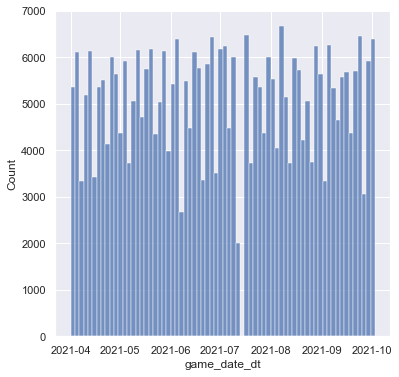

In [173]:
sns.histplot(x='game_date_dt', data=df_train_use)
sns.set(rc={'figure.figsize':(12,12)})
plt.show()

This smells right. Looks like it's a full season of data, roughly equally pulled across the season.

There's a gap in July, but that should be the All-Star break.

We don't need the old `game_date` so let's `drop`.

In [174]:
display(f'# columns before drop: {df_train_use.shape[1]}')
df_train_use.drop(['game_date'], axis=1, inplace=True)
display(f'# columns after drop: {df_train_use.shape[1]}')

'# columns before drop: 31'

'# columns after drop: 30'

__Test Data__

Let's look at the spread of dates.

In [175]:
# Create datetime version of column
df_test_use['game_date_dt'] = pd.to_datetime(df_test_use['game_date'])

Inspect histogram:

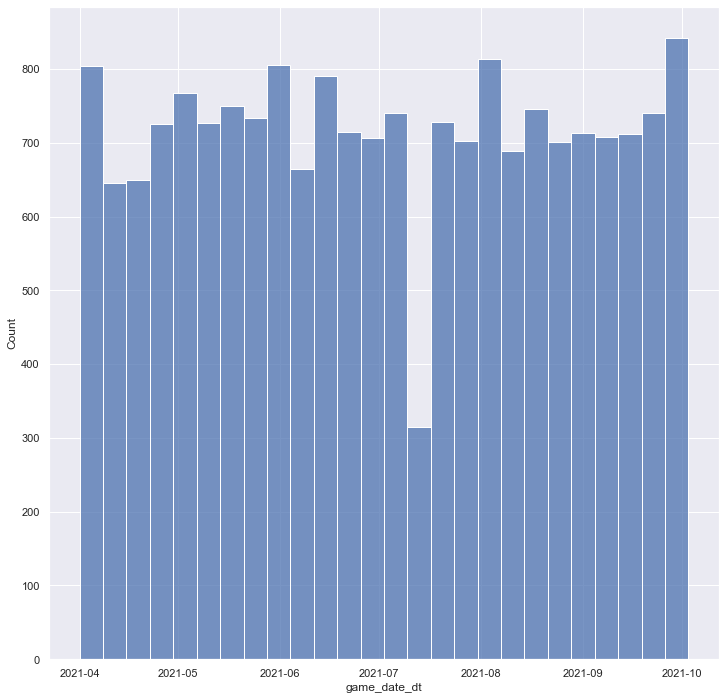

In [176]:
sns.histplot(x='game_date_dt', data=df_test_use)
sns.set(rc={'figure.figsize':(12,12)})
plt.show()

On visual inspection, looks like the test data is random sample from the same distribution of the train data. 

I'm ok with this.

In [177]:
display(f'# columns before drop: {df_test_use.shape[1]}')
df_test_use.drop(['game_date'], axis=1, inplace=True)
display(f'# columns after drop: {df_test_use.shape[1]}')

'# columns before drop: 30'

'# columns after drop: 29'

----
Let's look at those columns again:

In [178]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`inning`

Seems self-explanatory, let's take a quick look to make sure things look reasonable.

In [179]:
df_train_use['inning'].dtype

dtype('int64')

In [180]:
df_train_use['inning'].value_counts()

1     41940
2     40335
6     40249
7     40161
3     40132
5     39616
8     39416
4     39340
9     28683
10     2949
11      902
12      215
13       49
15       18
16       17
14        9
Name: inning, dtype: int64

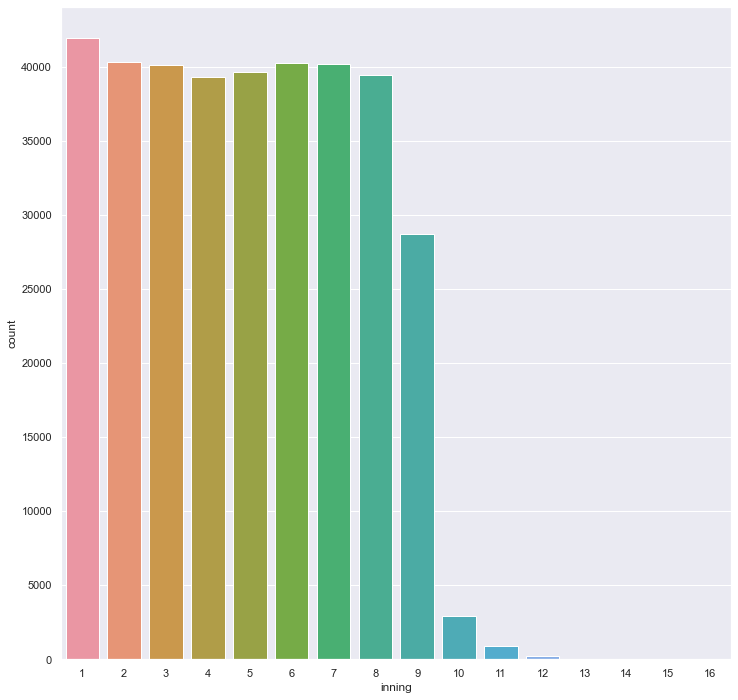

In [181]:
sns.countplot(x='inning', data=df_train_use)
sns.set(rc={'figure.figsize':(8,6)})
plt.show()

Seems to make sense:
- innings > 9 are extra inning games
- 9th innning having lower volume of pitches relative to `inning`s <=8 likely due to home team leading after top of the 9th.

I'm ok with this.

----
Let's look at those columns again:

In [182]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`side`


In [183]:
df_train_use.head()

,pitch_id,inning,side,run_diff,at_bat_index,pitch_of_ab,batter,pitcher,catcher,umpire,...,pitch_speed,px,pz,break_x,break_z,angle_x,angle_z,pitch_type,strike_bool,game_date_dt
0,01311c57-5046-48d7-ac68-000060a98ccb,7,home,-2,54,5,405947,756778,528871,482420,...,97.4298,-1.298100,2.302170,1.915350,-9.54142,3.02727,5.59379,FA,0,2021-05-13
1,208d0186-b7c9-46bd-8297-0001539b714c,9,home,4,69,2,468294,778005,594400,583103,...,91.7712,1.412220,1.574430,-12.137300,-21.94270,-1.56782,6.86676,FA,0,2021-07-29
2,4a24d09e-2d9b-4d12-a0eb-0004723ce539,1,home,0,1,3,406141,451846,633795,423579,...,87.8130,-0.181190,2.112480,-0.992261,-25.51070,2.04966,7.17281,SL,1,2021-05-15
3,486aa6b8-7c43-4974-8a53-000611a9c649,1,home,2,5,3,615134,564585,633812,482532,...,86.5546,-0.885538,0.598692,-2.839300,-27.25090,2.96845,8.50392,SL,0,2021-06-05
4,2aff251b-099b-447b-9862-00100124b7c1,3,home,-2,24,5,626949,784463,614419,596164,...,95.0891,0.900718,2.018200,-6.419950,-14.31720,-2.64734,5.63426,XX,1,2021-06-13


In [184]:
df_train_use['side'].value_counts()

home    179188
away    174843
Name: side, dtype: int64

---
`run_diff`

This seems to be run differential at the time of the pitch. Let's look to make sure the values agree with our understanding of that.


In [185]:
sns.set(rc={'figure.figsize':(8,4)})

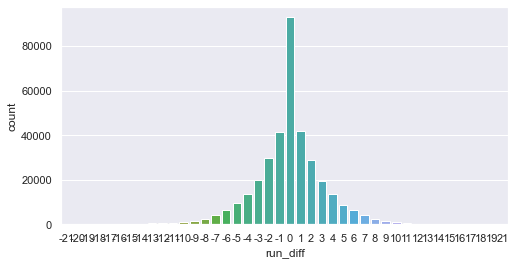

In [186]:
sns.countplot(x='run_diff', data=df_train_use)
plt.show()

Makes sense, leave as is.

---
`at_bat_index`

This appears to be enumerated at-bats, starting at index `0`.


In [187]:
df_train_use['at_bat_index'].value_counts(sort=False)

0      4680
1      4836
2      4843
3      4860
4      4822
       ... 
120       2
121       3
122       1
123       2
124       4
Name: at_bat_index, Length: 121, dtype: int64

In [188]:
sns.set(rc={'figure.figsize':(18,6)})

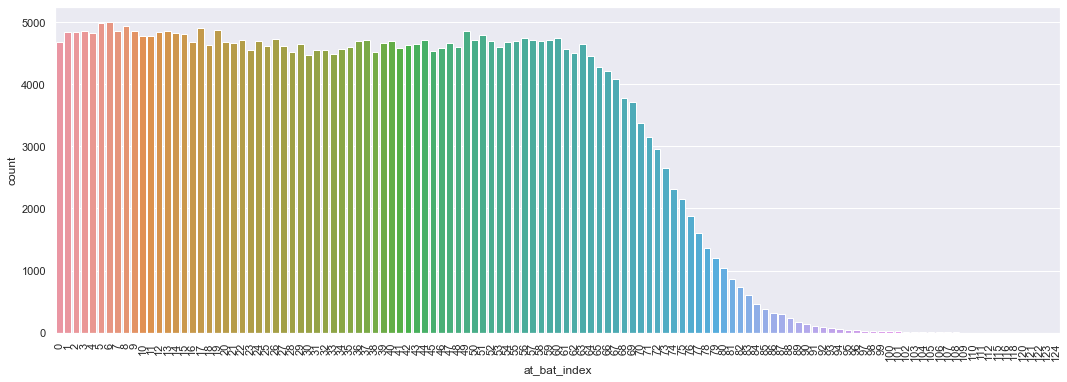

In [189]:
ax = sns.countplot(x='at_bat_index', data=df_train_use)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Ok, this smells ok, it should indicate the number of at bats for both teams over the course of the game.

----
Let's look at those columns again:

In [190]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`pitch_of_ab`

Sounds like enumerated pitch during an at-bat.

In [191]:
sns.set(rc={'figure.figsize':(18,6)})

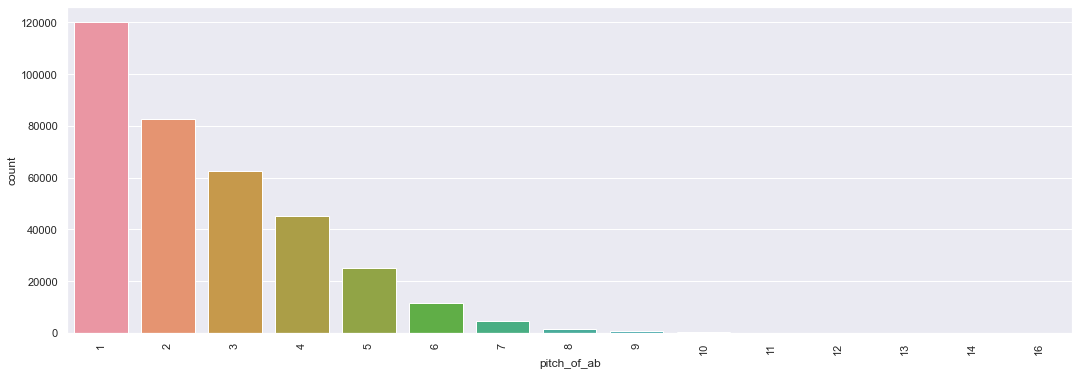

In [192]:
ax = sns.countplot(x='pitch_of_ab', data=df_train_use)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Makes sense.

---
`batter`, `pitcher`, `catcher`, `umpire`

These look like IDs for the individual persons in these roles.

In [193]:
roles = ['batter', 'pitcher', 'catcher', 'umpire']

In [194]:
# Get value counts for each role
for i in range(len(roles)):
    display(df_train_use.loc[:,roles[i]].value_counts())
    print('\n')

627264    1651
782551    1608
627785    1542
784584    1537
785447    1501
          ... 
777115       1
776776       1
773396       1
565835       1
406163       1
Name: batter, Length: 1032, dtype: int64

529217    1684
501531    1636
565784    1554
565989    1540
565870    1532
          ... 
785946       1
529451       1
530174       1
577470       1
579250       1
Name: pitcher, Length: 909, dtype: int64

627932    9091
404869    8882
469396    8649
501708    8630
594400    8048
          ... 
529360      15
563292      14
780355      11
777271      10
777642      10
Name: catcher, Length: 116, dtype: int64

574224    5055
634203    5015
404602    4891
574236    4778
482473    4634
          ... 
482682     776
527980     324
583102     323
565191     144
564951     128
Name: umpire, Length: 99, dtype: int64

So it appears that there are about 1k different `batter`s, 900 different `pitcher`s, >100 different `catcher`s, and ~100 `umpires`

The relative size makes sense. While it's arguable that the presence of a certain individual can affect the strike call (umpires have different strike zones, some pitchers are more wild, some catchers excel at framing, etc.) I'm not entirely sure how feasible it will be to use any of all of these as categories since it would greatly increasing the dimensionality of the dataset. But we'll keep for now.

----
Let's look at those columns again:

In [195]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`bside`, `pside`

Sounds like the Side/Handedness of the batter and pitcher.

In [196]:
sides = ['bside', 'pside']

In [197]:
# Get value counts for each role
for i in range(len(sides)):
    display(df_train_use.loc[:,sides[i]].value_counts())
    print('\n')

R    207666
L    146365
Name: bside, dtype: int64

R    249281
L    104750
Name: pside, dtype: int64

I think this is a reasonable assumption. Leave as is.

---
`stringer_zone_bottom`, `stringer_zone_top`

I really didn't have a pre-existing idea what this could be, but on some research I think it's the following:

From [Baseball Prospectus]():  
>_For postgame analysis, there is no standard definition of the strike zone. That’s partly because most postgame analysis is done without the knowledge of each particular batter’s stance. In the absence of the batter’s stance information, analysts use a generic, “typical” batter strike zone, but each analyst has their own idea of the dimensions and location. Or they might use data of the top and bottom, which is set by MLB stringers. But **stringers are people setting a top and bottom based on their subjective assessment, or they use pre-defined values obtained at some random time that may or may not be relevant to the player at the time of batting.**_

So while it sounds like there is some subjectivity to the setting of these values it basically acts as proxy for height/stance; it is very likely information that will have some signal.

Let's take a look.

In [198]:
zone_edges = ['stringer_zone_bottom', 'stringer_zone_top']

1.53    53025
1.56    50127
1.59    47673
1.60    34038
1.51    33166
        ...  
1.05        1
2.27        1
0.79        1
2.09        1
1.00        1
Name: stringer_zone_bottom, Length: 119, dtype: int64

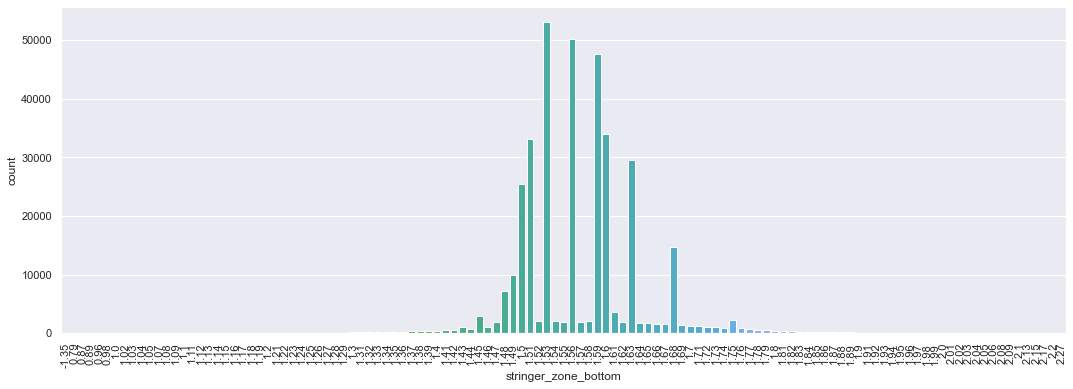

3.37    52274
3.41    49011
3.47    46044
3.32    32287
3.49    32069
        ...  
2.31        1
4.17        1
4.20        1
2.59        1
4.52        1
Name: stringer_zone_top, Length: 179, dtype: int64

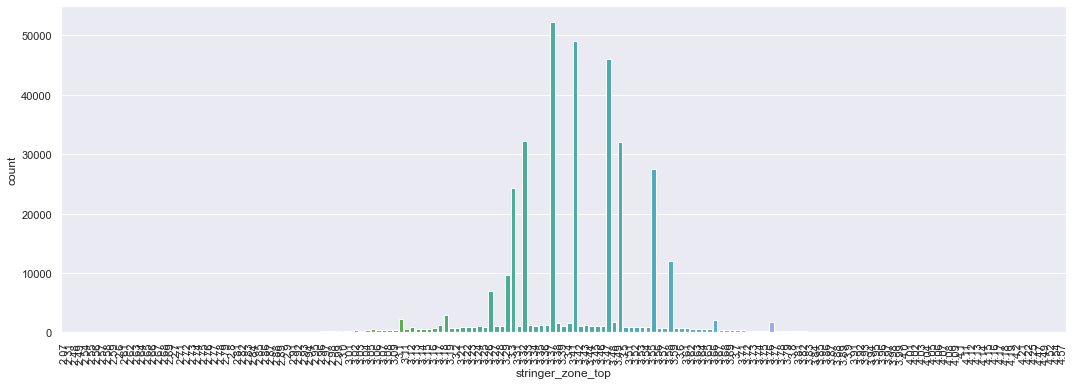

In [199]:
# Get value counts for each role
for i in range(len(zone_edges)):
    display(df_train_use.loc[:,zone_edges[i]].value_counts())
    ax = sns.countplot(x=zone_edges[i], data=df_train_use)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

Without really digging into it more, it seems like while there is a regularity of precision to the measurements, in other words, there are only a handful of values that get recorded by stringers almost all the time. It might have to do with work conventions, or the tools used to measure or record.

Leave as is.

----
Let's look at those columns again:

In [200]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`on_1b_mlbid`, `on_2b_mlbid`, `on_3b_mlbid`

Seems self-explanatory, ID's of players on base at the time of the pitch.

In [201]:
runners = ['on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid']

In [202]:
# Get value counts for each role
for i in range(len(runners)):
    display(df_train_use.loc[:,runners[i]].value_counts())
    # ax = sns.countplot(x=runners[i], data=df_train_use)
    # ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

782551.0    626
406351.0    588
784827.0    565
528790.0    510
781533.0    509
           ... 
785113.0      1
422713.0      1
576686.0      1
561160.0      1
529333.0      1
Name: on_1b_mlbid, Length: 822, dtype: int64

777964.0    330
627304.0    320
578271.0    315
406351.0    313
777694.0    311
           ... 
623679.0      1
526645.0      1
561169.0      1
528649.0      1
538101.0      1
Name: on_2b_mlbid, Length: 764, dtype: int64

541952.0    170
577817.0    169
784584.0    166
565637.0    164
537271.0    162
           ... 
468877.0      1
561169.0      1
525040.0      1
405805.0      1
614999.0      1
Name: on_3b_mlbid, Length: 699, dtype: int64

Based on that there are hundreds of each that seems likely. 

Let's keep as is for now. as with the player info, it would be categories with high cardinality, so I'm not sure if the increase in model complexity of integrating them will be worth it. But we will keep in mind as an option.

----
Let's look at those columns again:

In [203]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
`outs`, `balls`, `stikes`

Seems self-explanatory, let's make sure the distribution makes sense.

In [204]:
states = ['outs', 'balls', 'strikes']

0    123460
1    115584
2    114987
Name: outs, dtype: int64

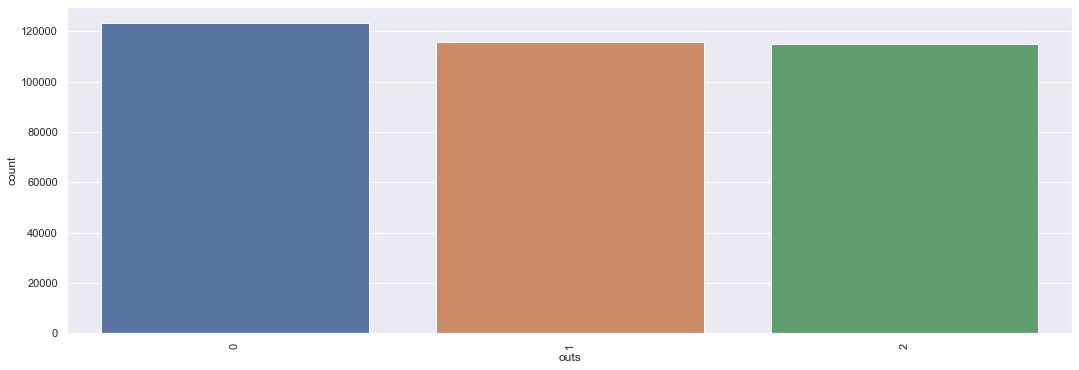

0    185786
1     97550
2     47811
3     22884
Name: balls, dtype: int64

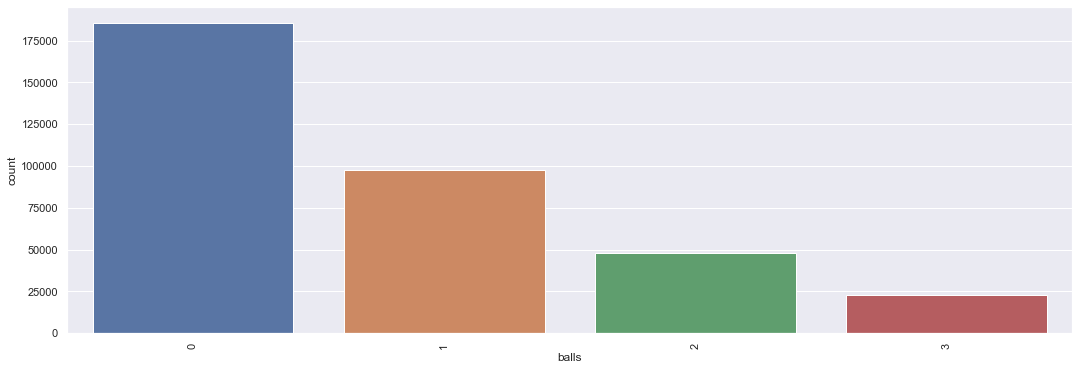

0    178491
1     96646
2     78894
Name: strikes, dtype: int64

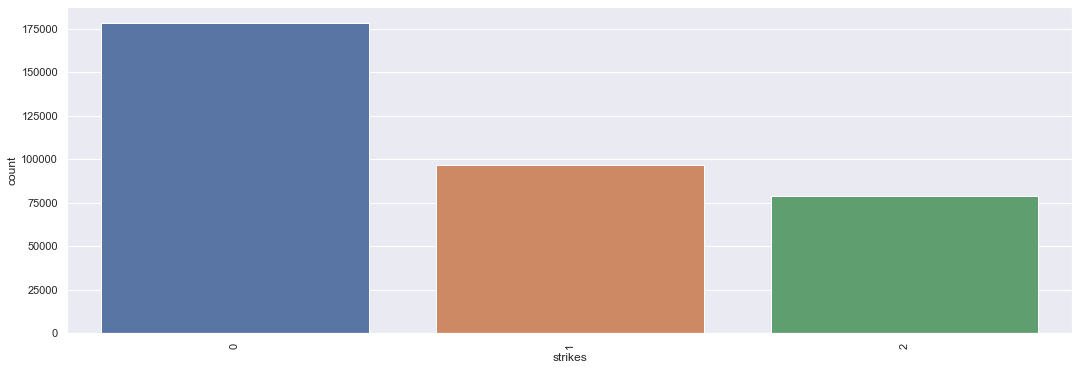

In [205]:
# Get value counts for each role
for i in range(len(states)):
    display(df_train_use.loc[:,states[i]].value_counts())
    ax = sns.countplot(x=states[i], data=df_train_use)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()
    print('\n')

Makes sense. No out 3, ball 4, or strike 3 since these are states that exist at beginning of pitch; the 'missing' ones are outcomes after pitches.

---
`pitch_speed`

Ok, now I think we're getting to some of the more fun features!

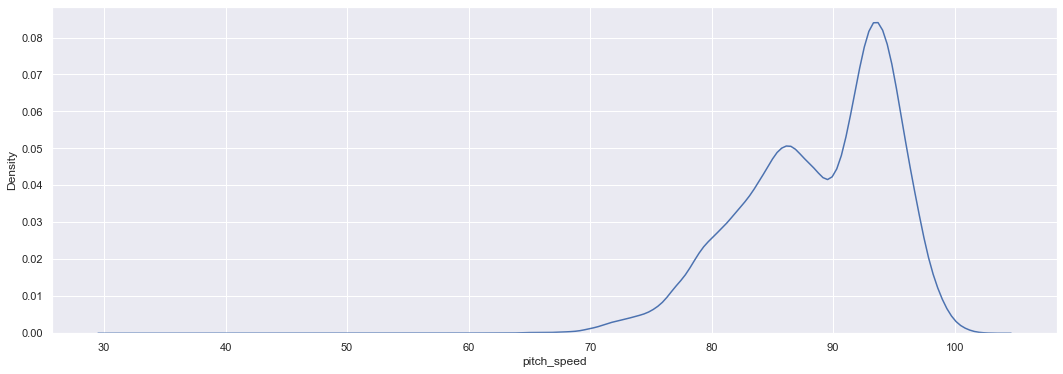

In [206]:
ax = sns.kdeplot(x='pitch_speed', data=df_train_use)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [207]:
df_train_use.pitch_speed.isnull().any()

False

Seems to make sense with my impression on modern pitch speeds. I won't bother segmented by pitch type, but we should expect to see differences there between, say, breaking balls and fastballs.

----
Let's look at those columns again:

In [208]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
---
`px`, `pz`, `break_x`, `break_z`, `angle_x`, `angle_z`

I'm guessing that px/pz are the coordinates of the ball at the plate. I'm guessing some combination of break and angle will can be used to back out the pitch to the release point. 

let's dig into them to get an idea!

In [209]:
pitch_attr = ['px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z']

In [210]:
df_train_use[pitch_attr].describe()

,px,pz,break_x,break_z,angle_x,angle_z
count,354031.000000,354031.000000,354031.000000,354031.000000,354031.000000,354031.000000
mean,0.058008,2.195334,-1.119928,-24.897325,-0.739256,6.698777
std,1.012406,1.163855,9.346261,12.292593,2.337547,2.094171
min,-6.108250,-5.129250,-29.858000,-277.493000,-13.126600,-1.607850
25%,-0.709942,1.379410,-9.071635,-32.255400,-2.362625,5.199380
50%,0.079497,2.155100,-1.783030,-22.444300,-0.849867,6.477990
75%,0.823325,3.013080,6.417400,-14.591800,0.778791,8.072710
max,9.118460,9.417090,30.722700,10.488200,10.233500,31.635700


- `px` seems to make sense, it implies that 0 is the middle of the plate.
- `pz`, also makes sense; even though there is a large negative number I think 0 is intended to be the ground. I wonder if a negative number is the ball gets spiked before getting to the plate.
- `break_x`, `break_y`, `angle_x`, `angle_y` - it might make more sense to separate these by handedeness. 

Let's viz by pitcher handedness.

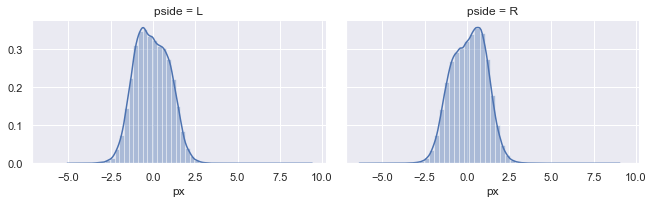

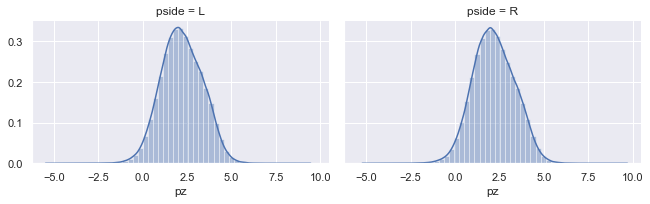

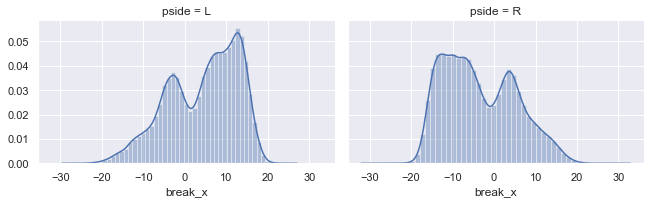

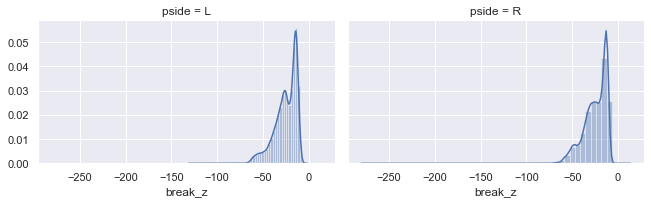

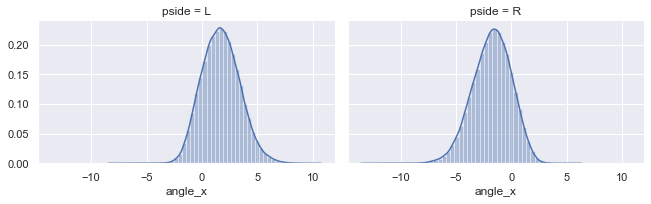

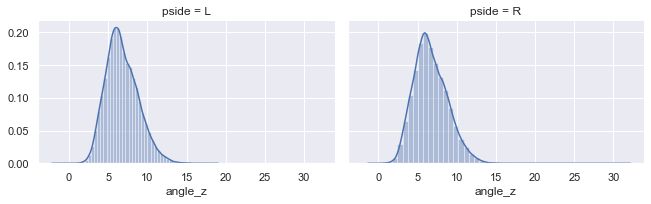

In [211]:
# sns.set(rc={'figure.figsize':(12,12)})
for p in pitch_attr:
    g = sns.FacetGrid(data=df_train_use, col="pside", height=3, aspect=1.5, col_wrap=3)
    g.map(sns.distplot, p)
    plt.show()

- `px` - Makes sense, roughly centered on 0, as observed before.
- `pz` - Confirms that it should be limited on the low end at 0, but likely it's just measurement error (or a way to capture pitches that fall before the plate.
- `break_x` - ROUGHLY mirror images vis a vis pitcher handedness, which makes intuitive sense. I still need to confirm example what this is, but for now seems ok.
- `break_z` - only negative numbers, which makes sense if its thought of as how far a pitch drops from release point. Gravity is ALWAYS at work.
- `angle_x` - R vs L favors opposing sides, so I think this makes sense because it think of it as some kind of indication of run.
- `angle_z` - similar to the discussion on breaks above, Z-axis measurement will be more similar rather than opposite because handedness shouldn't large impact verticality of pitch, in my layman's view.

I'd like to build more intution for the pitch coordinates. 

let's try to isolate to one pitcher. Let's use a high volume one.

In [212]:
# Value counts by pitcher
df_train_use['pitcher'].value_counts()

529217    1684
501531    1636
565784    1554
565989    1540
565870    1532
          ... 
785946       1
529451       1
530174       1
577470       1
579250       1
Name: pitcher, Length: 909, dtype: int64

`529217` is the big winner.

In [213]:
pitch_sample = df_train_use[df_train_use['pitcher']==529217]

To simplify further, let's limit to one game.

In [214]:
pitch_sample['game_date_dt'].value_counts().sort_index()

2021-04-03    48
2021-04-09    49
2021-04-14    51
2021-04-21    48
2021-04-26    52
2021-05-02    45
2021-05-10    53
2021-05-15    43
2021-05-20    38
2021-05-25    51
2021-05-30    52
2021-06-05    42
2021-06-11    43
2021-06-16    60
2021-06-21    47
2021-06-27    50
2021-07-03    56
2021-07-08    58
2021-07-16    57
2021-07-23    50
2021-07-28    59
2021-08-03    51
2021-08-08    51
2021-08-13    51
2021-08-18    53
2021-08-24    54
2021-08-29    59
2021-09-04    64
2021-09-10    47
2021-09-16    50
2021-09-21    49
2021-09-26    58
2021-10-02    45
Name: game_date_dt, dtype: int64

Interesting pitch counts, a middle reliever? If it was a starter I would expect something more [closer to 100](https://www.google.com/search?q=average+starter+pitch+count&rlz=1C5CHFA_enUS805US805&oq=average+starter+pitch&aqs=chrome.0.0i512j69i57j0i22i30j0i390.3948j0j7&sourceid=chrome&ie=UTF-8)?

I'm going to be stubborn and maybe try to find a starter.

In [215]:
total_pitches = (df_train_use.groupby(['pitcher']).agg({'pitch_id': 'count'})
                 .reset_index().rename(columns={'pitch_id': 'pitch_total'})
                )

In [216]:
total_pitches

,pitcher,pitch_total
0,402341,388
1,404301,27
2,404567,434
3,405668,134
4,405760,89
...,...,...
904,785741,34
905,785743,418
906,785778,203
907,785945,506


In [217]:
total_games = (df_train_use.loc[:,['pitcher', 'game_date_dt']].value_counts()
               .reset_index().groupby('pitcher').agg({'game_date_dt': 'count'})
               .reset_index().rename(columns={'game_date_dt': 'game_ct'})
              )

In [218]:
total_games

,pitcher,game_ct
0,402341,48
1,404301,4
2,404567,63
3,405668,18
4,405760,13
...,...,...
904,785741,2
905,785743,50
906,785778,19
907,785945,13


In [219]:
avg_pitch_ct = pd.merge(total_pitches, total_games, on='pitcher')

In [220]:
avg_pitch_ct['avg_pitch_ct']= avg_pitch_ct.pitch_total / avg_pitch_ct.game_ct

In [221]:
avg_pitch_ct.sort_values(by='avg_pitch_ct', ascending=False)

,pitcher,pitch_total,game_ct,avg_pitch_ct
327,565784,1554,28,55.500000
570,625260,924,17,54.352941
659,760842,54,1,54.000000
887,785028,1148,22,52.181818
125,501531,1636,32,51.125000
...,...,...,...,...
414,577470,1,1,1.000000
443,578434,1,1,1.000000
868,784756,1,1,1.000000
461,579250,1,1,1.000000


Hmmm, even when I do that the averages are around 50ish on the high end; perhaps some of the data is filtered out? And as we noticed before, maybe some pitches in sequence are left out.

Let's go back to our previously targeted pitcher, `529217`.

In [222]:
pitch_sample.sort_values(by=['game_date_dt', 'inning', 'at_bat_index', 'pitch_of_ab'])

,pitch_id,inning,side,run_diff,at_bat_index,pitch_of_ab,batter,pitcher,catcher,umpire,...,pitch_speed,px,pz,break_x,break_z,angle_x,angle_z,pitch_type,strike_bool,game_date_dt
228463,c037bac1-0d8b-435e-8d19-f13d8d7a6231,1,home,0,0,1,781923,529217,614419,482764,...,94.3089,-0.011852,1.288740,-10.53680,-12.6884,-0.894833,5.81573,FA,1,2021-04-03
38021,0ba0fe81-6e17-4474-bd4d-4900f9902a3d,1,home,0,0,2,781923,529217,614419,482764,...,95.0273,0.421552,2.017410,-10.66100,-12.6922,-1.112470,5.16434,FA,1,2021-04-03
176118,67d9b05f-168f-4517-b0d2-65d22e60dfdd,1,home,0,1,1,422870,529217,614419,482764,...,90.7830,0.226779,2.649690,2.42336,-21.9435,-2.434110,5.55567,SL,1,2021-04-03
43437,0f0b69e8-9801-4dc1-9669-5a3696ab1014,1,home,0,1,2,422870,529217,614419,482764,...,90.3769,0.807044,2.025580,1.78292,-21.8887,-2.805070,6.16741,SL,1,2021-04-03
72301,3f09fb85-8045-40e0-802e-8e29b5bc688b,1,home,0,1,3,422870,529217,614419,482764,...,97.2255,2.091950,0.929645,-11.13270,-10.4579,-2.758610,6.08830,FA,0,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41411,1792cfe4-8cab-4377-a7d7-55ecbc01dccb,5,away,-5,40,5,782512,529217,784663,427294,...,95.4889,0.269376,3.614100,-9.09135,-11.7611,-1.116970,3.50959,FA,1,2021-10-02
155335,650d0997-e685-40a8-9c93-3c162221df2d,5,away,-2,42,3,777980,529217,784663,427294,...,94.5097,-0.165084,4.198560,-10.67230,-13.6971,-0.645365,2.97333,FA,0,2021-10-02
337936,f62af481-d152-4dcd-b571-d79e24c218ae,5,away,-1,43,1,772895,529217,784663,427294,...,94.6752,0.924724,2.393480,-9.38011,-13.6629,-1.992140,4.88670,FA,0,2021-10-02
95047,24711ac0-3373-45cf-8ad2-b153a8ee9ddc,5,away,-1,43,2,772895,529217,784663,427294,...,85.7835,-1.536890,2.055540,-12.72040,-25.8839,0.707763,6.18867,CH,0,2021-10-02


In [223]:
pitch_sample.sort_values(by=['game_date_dt', 'inning', 'at_bat_index', 'pitch_of_ab']).T

,228463,38021,176118,43437,72301,82272,251746,183938,46071,241605,...,220841,139672,42352,144899,328004,41411,155335,337936,95047,332931
pitch_id,c037bac1-0d8b-435e-8d19-f13d8d7a6231,0ba0fe81-6e17-4474-bd4d-4900f9902a3d,67d9b05f-168f-4517-b0d2-65d22e60dfdd,0f0b69e8-9801-4dc1-9669-5a3696ab1014,3f09fb85-8045-40e0-802e-8e29b5bc688b,36c02ec7-1ce7-4afd-b3a0-9a3b7ec5fd1a,734c5eab-da18-4c69-a5c8-5a91f079157a,a168118f-91d4-4f4f-b63d-7c7ae847f7a0,1bf3bcec-9b53-4c66-b356-602654549c55,84daa385-e05b-4549-97e2-1ae292bcb1fc,...,619807e5-23ed-41c8-a15a-cb23a514553f,afd6f260-2a86-414a-9565-1743bd3300fe,44c610fc-31d1-4d58-b756-5e9e54ba1c14,a7c22744-f77a-422c-9046-266bffc4fdfa,ca99db4f-85e1-4469-8108-aaf04d0c22b3,1792cfe4-8cab-4377-a7d7-55ecbc01dccb,650d0997-e685-40a8-9c93-3c162221df2d,f62af481-d152-4dcd-b571-d79e24c218ae,24711ac0-3373-45cf-8ad2-b153a8ee9ddc,e5493adf-e7a7-4457-915b-b9667123835c
inning,1,1,1,1,1,1,1,1,1,2,...,5,5,5,5,5,5,5,5,5,5
side,home,home,home,home,home,home,home,home,home,home,...,away,away,away,away,away,away,away,away,away,away
run_diff,0,0,0,0,0,0,0,0,0,0,...,-5,-5,-5,-5,-5,-5,-2,-1,-1,-1
at_bat_index,0,0,1,1,1,1,1,2,2,6,...,39,39,40,40,40,40,42,43,43,43
pitch_of_ab,1,2,1,2,3,4,5,1,2,1,...,2,3,2,3,4,5,3,1,2,6
batter,781923,781923,422870,422870,422870,422870,422870,614497,614497,774348,...,564653,564653,782512,782512,782512,782512,777980,772895,772895,772895
pitcher,529217,529217,529217,529217,529217,529217,529217,529217,529217,529217,...,529217,529217,529217,529217,529217,529217,529217,529217,529217,529217
catcher,614419,614419,614419,614419,614419,614419,614419,614419,614419,614419,...,784663,784663,784663,784663,784663,784663,784663,784663,784663,784663
umpire,482764,482764,482764,482764,482764,482764,482764,482764,482764,482764,...,427294,427294,427294,427294,427294,427294,427294,427294,427294,427294


Ok, on simple inspection we see some gaps where we would expect data. 

For example, in the tail there is missing at-bat `41` and for `42` there are missing pitches. Maybe something like intentional walks are missing? That doesn't quite smell right. I'm guessing that maybe they are just left out of sample.


Ok, for now, but will jot as clarification question.

Let's continue with our pitch sample.

In [224]:
# Which game has most pitches?
pitch_sample['game_date_dt'].value_counts(sort=True)

2021-09-04    64
2021-06-16    60
2021-07-28    59
2021-08-29    59
2021-07-08    58
2021-09-26    58
2021-07-16    57
2021-07-03    56
2021-08-24    54
2021-08-18    53
2021-05-10    53
2021-05-30    52
2021-04-26    52
2021-05-25    51
2021-08-13    51
2021-04-14    51
2021-08-03    51
2021-08-08    51
2021-06-27    50
2021-09-16    50
2021-07-23    50
2021-09-21    49
2021-04-09    49
2021-04-03    48
2021-04-21    48
2021-09-10    47
2021-06-21    47
2021-10-02    45
2021-05-02    45
2021-06-11    43
2021-05-15    43
2021-06-05    42
2021-05-20    38
Name: game_date_dt, dtype: int64

In [225]:
#2021-09-04 
pitch_sample_small = pitch_sample[pitch_sample['game_date_dt']=='2021-09-04']

In [226]:
pitch_sample_small.head().T

,629,9971,17068,19935,44134
pitch_id,31da1525-628a-4d8d-9a35-01af53ad7892,4b18c6d6-86c2-4976-93f1-1463c19732d1,59b87c8b-7a82-4973-b0ca-1e6275afd591,0b237d44-365d-4c4f-9de3-274bf7e4e328,191cd5e7-9de1-4cc4-bc37-4ff9ca3c46c6
inning,3,5,4,5,2
side,home,home,home,home,home
run_diff,0,-2,-2,-2,0
at_bat_index,20,45,33,40,11
pitch_of_ab,3,3,2,3,2
batter,516851,615910,777408,617778,615910
pitcher,529217,529217,529217,529217,529217
catcher,784663,784663,784663,784663,784663
umpire,427369,427369,427369,427369,427369


What hand?

In [227]:
pitch_sample['pside'].unique()

array(['R'], dtype=object)

Right side.

Let's do some plots to start building our feel for the data.

In [228]:
sns.set(rc={'figure.figsize': (6,6)})

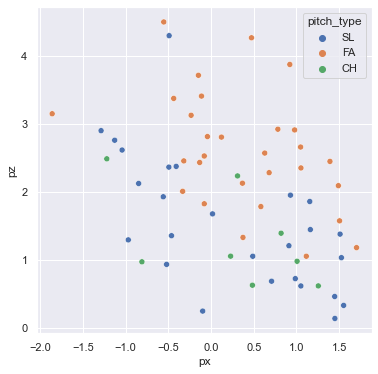

In [229]:
sns.scatterplot(data=pitch_sample_small, x='px', y='pz',hue='pitch_type')
plt.show()

Very interesting and makes intuitive sense; the slider (presumably SL) has more of a sweeping action relative to the Fastballs (FA). 

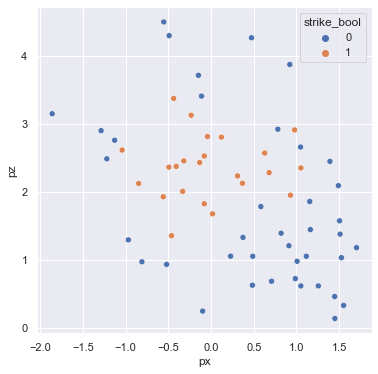

In [230]:
sns.scatterplot(data=pitch_sample_small, x='px', y='pz',hue='strike_bool')
plt.show()

Also makes intuitive sense, you can see the rough donut hold that acts as an amalgam of all the strike zones of the batters this pitcher faced. Cool!

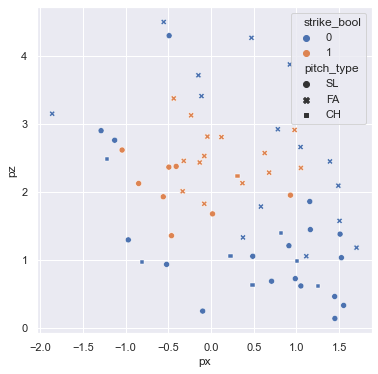

In [231]:
sns.scatterplot(data=pitch_sample_small, x='px', y='pz',hue='strike_bool', style='pitch_type')
plt.show()

A mix of the two. Approaches. Kind of clusmy, but neat.

OK, I'm comfortable with the data for now, but I do want to check in on the exact definitions for `break` and `angle` at some point.

----
Let's look at those columns again:

In [232]:
print(list(df_train_use.columns))

['pitch_id', 'inning', 'side', 'run_diff', 'at_bat_index', 'pitch_of_ab', 'batter', 'pitcher', 'catcher', 'umpire', 'bside', 'pside', 'stringer_zone_bottom', 'stringer_zone_top', 'on_1b_mlbid', 'on_2b_mlbid', 'on_3b_mlbid', 'outs', 'balls', 'strikes', 'pitch_speed', 'px', 'pz', 'break_x', 'break_z', 'angle_x', 'angle_z', 'pitch_type', 'strike_bool', 'game_date_dt']


---
---
`pitch_type`

This seems pretty straightforward, the biggest thing is potentially having to one-hot encode these, but there universe of pitches isn't large compared to some other potential categorical features (e.g. `batter`, `pitcher`, `umpire`, etcs)

In [233]:
df_train_use['pitch_type'].value_counts()

FA    180508
SL     89822
CH     41997
CU     38621
XX      2658
AP       366
KN        11
Name: pitch_type, dtype: int64

To me, these are:
- `FA` = Fastball
- `SL` = Slider
- `CH` = Changeup
- `CU` = Cutter
- `XX` = ???
- `AP` = ???
- `KN` = Knuckleball

What are `XX` and `AP`? These might be rollups of more obscure pitches, like an [eephus](https://en.wikipedia.org/wiki/Eephus_pitch).

I want to double check that test has similar values.

In [234]:
df_test_use['pitch_type'].value_counts()

FA    9495
SL    4721
CH    2217
CU    2034
XX     142
AP      19
KN       1
Name: pitch_type, dtype: int64

OK, it does. One thing might want to keep in mind is that certain pitches (e.g. knuckleballs) are relatively rare, so we might have trouble picking up strike signals for that (although in the case of that pitch, we might not really care because its movement is more unpredictable, or so I understand.

Roughly eyeballing it too, I'm wondering if there was intention to split train and test in a stratified manner across pitches?

In [235]:
train_pitch_dist = (df_train_use['pitch_type'].value_counts().reset_index()
                    .rename(columns={'pitch_type': 'train', 'index': 'pitch_type'})
                   )

In [236]:
test_pitch_dist = (df_test_use['pitch_type'].value_counts().reset_index()
                    .rename(columns={'pitch_type': 'test', 'index': 'pitch_type'})
                   )

In [237]:
pitch_type_data_dist = pd.merge(train_pitch_dist, test_pitch_dist, how='inner', on='pitch_type')

In [238]:
pitch_type_data_dist['train_pct'] = pitch_type_data_dist['train'] / (pitch_type_data_dist['train'] + pitch_type_data_dist['test'])

In [239]:
pitch_type_data_dist

,pitch_type,train,test,train_pct
0,FA,180508,9495,0.950027
1,SL,89822,4721,0.950065
2,CH,41997,2217,0.949858
3,CU,38621,2034,0.949969
4,XX,2658,142,0.949286
5,AP,366,19,0.950649
6,KN,11,1,0.916667


Almost spot on across all; **MAYBE!**, and it makes sense for knuckleball because the count is so low:

In [240]:
round(.95 * 12,0)

11.0

95% of 12 ~ 11

Are there any missing values?

In [241]:
display(f"# missing pitches: {df_train_use['pitch_type'].isna().sum()}")
display(f"% missing pitches: {df_train_use['pitch_type'].isna().sum()/df_train_use.shape[0]}")

'# missing pitches: 48'

'% missing pitches: 0.00013558134739613198'

Yes there are. Since it's such a tiny amount, let's drop them.

In [242]:
display(f"Expected # of rows after drop: {df_train_use.shape[0] - df_train_use['pitch_type'].isna().sum()}")

'Expected # of rows after drop: 353983'

In [243]:
display(df_train_use.shape[0])
df_train_use.dropna(axis=0, subset=['pitch_type'], inplace=True)
display(df_train_use.shape[0])

354031

353983

However, I won't do the same for `df_test_use`. The reasoning is that the Test set in this context is acting as Holdout data for final testing. So I don't want to eliminate any rows for it, and besides unlikely I will add `pitch_type` as a feature (I think the physical metrics of the pitch would act enough as a proxy for that). But I definitely want to remove it from the training set because I think it will help it generalize better.


One last thing to check, I'd like to visualize those `AP`, `XX` pitches.

In [244]:
ap_xx = df_train_use['pitch_type'].isin(['AP','XX'])
df_ap_xx = df_train_use[ap_xx]

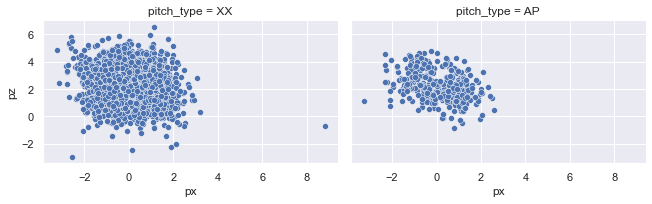

In [245]:
g = sns.FacetGrid(data=df_ap_xx, col="pitch_type", height=3, aspect=1.5, col_wrap=3)
g.map(sns.scatterplot, 'px', 'pz')
plt.show()

Nothing really telling there. More to come.

<h5><span style="color:teal"> 2022.05.06 Update</span></h5>  
Found that that types 'XX' and 'AP' are generall excluded from analysis. Let's do the same here.

In [246]:
df_train_use = df_train_use[~ap_xx]

In [247]:
df_train_use.shape

(350959, 30)

And for the similar reasons as to why we didn't drop rows with missing pitches from the Test data is also why I won't drop any test data with `AP` or `XX`.

---
---
`strike_bool`

Finally, the target. Let's take a look.

In [248]:
df_train_use['strike_bool'].value_counts()

0    241061
1    109898
Name: strike_bool, dtype: int64

In [249]:
11/(11+24.3)

0.311614730878187

Maybe feels a little low? Does the data exclude contacted balls? Will add to clarification list.

I like working with pure Booleans, so might want to convert to true `Boolean`, but for now let's just add a secondary version.

In [250]:
df_train_use['strike_bool_tf'] = df_train_use['strike_bool'].astype('bool')

In [251]:
df_train_use[['strike_bool', 'strike_bool_tf']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350959 entries, 0 to 354038
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   strike_bool     350959 non-null  int64
 1   strike_bool_tf  350959 non-null  bool 
dtypes: bool(1), int64(1)
memory usage: 5.7 MB


In [252]:
df_train_use[['strike_bool', 'strike_bool_tf']].value_counts()

strike_bool  strike_bool_tf
0            False             241061
1            True              109898
dtype: int64

----
---
Feeling comfortable with all the data so far. Let's do a few more global checks.

Let's check change in row counts.

In [255]:
display(f'df_train has {df_train.shape[0]} rows, which reduced down to {df_train_use.shape[0]} rows in df_train_use!')

'df_train has 354039 rows, which reduced down to 350959 rows!'

In [257]:
display(f'df_test has {df_test.shape[0]} rows, which should be equal to df_test_use, {df_test_use.shape[0]} rows!')

'df_test has 18633 rows, which should be equal to df_test_use, 18633 rows!'

In [258]:
df_train_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350959 entries, 0 to 354038
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   pitch_id              350959 non-null  object        
 1   inning                350959 non-null  int64         
 2   side                  350959 non-null  object        
 3   run_diff              350959 non-null  int64         
 4   at_bat_index          350959 non-null  int64         
 5   pitch_of_ab           350959 non-null  int64         
 6   batter                350959 non-null  int64         
 7   pitcher               350959 non-null  int64         
 8   catcher               350959 non-null  int64         
 9   umpire                350959 non-null  int64         
 10  bside                 350959 non-null  object        
 11  pside                 350959 non-null  object        
 12  stringer_zone_bottom  350959 non-null  float64       
 13 

- The only data with missing rows are the on-base indicators, which we decided to leave as is for now.
- I'm ok with the current `dtype`s. Let's move on to our first bad model :)

Let's save out our curated data set for the next stage.

In [259]:
df_train_use.to_pickle('../data/train_enriched.pkl')
df_test_use.to_pickle('../data/test_enriched.pkl')

...and let's test 're-create-ability'

In [260]:
df_train_temp = pd.read_pickle('../data/train_enriched.pkl')
df_test_temp = pd.read_pickle('../data/test_enriched.pkl')

In [261]:
test_equal = df_test_temp.equals(df_test_use)
display(f'df_test_temp is equal to df_test_use?: {test_equal}')

train_equal = df_train_temp.equals(df_train_use)
display(f'df_train_temp is equal to df_train_use?: {train_equal}')


'df_test_temp is equal to df_test_use?: True'

'df_train_temp is equal to df_train_use?: True'

Used `pickle` instead this time because `csv` was having problems with two-way datetime conversion.